#Simple Polynomial Linear Regression

🔹 Concept:

Instead of a straight line, it fits a curved line by adding higher-degree polynomial terms of x.

Example: Modeling non-linear relationships like population growth or stock prices.

🔹 Use Case: When data has curvature that a straight line cannot fit.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

from sklearn.metrics import r2_score

from sklearn.pipeline import Pipeline

In [ ]:
X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.rand(200, 1) #adding little bit of noise to the equation

# y = 0.8x^2 + 0.9x + 2

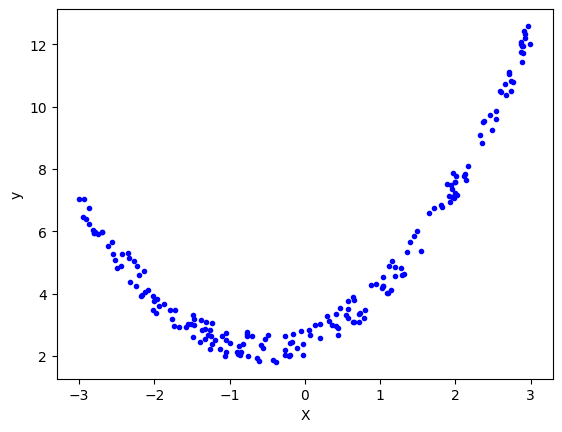

In [ ]:
plt.plot(X, y,'b.')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# If we use Linear regression and plot the best fit line, you can see that why this regression isn't used for data that aren't linear.

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(X_test)
r2_score(y_test, y_pred)

0.4994423504675519

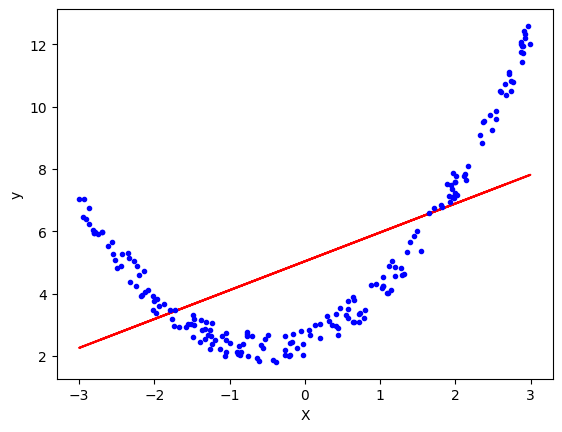

In [ ]:
plt.plot(X_train, lr.predict(X_train), color='red')
plt.plot(X, y, "b.")
plt.xlabel("X")
plt.ylabel('y')
plt.show()

In [ ]:
#Applying Polynomial Linear Regression
#degree = 2
#We will transform the features using PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=True)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

#In PolynomialFeatures(inclue_bias is always set to True unless specified it to be false; B0 won't be included if set to false)
#transforming here ---> 1 col of X will be converted to 3 cols i.e (X^0, X^1, X^2)
#transforming only applies to X and not to output(y)col.
#include_bias is set to False ----> then we get only X^1 and X^2 and not X^0

In [ ]:
print(X_train[0]) #original data
print(X_train_trans[0]) #One of the transformed value of X to ----> (X^0, X^1, X^2)


[-2.70027248]
[ 1.         -2.70027248  7.29147147]


In [ ]:
lr = LinearRegression()
lr.fit(X_train_trans, y_train)

LinearRegression()

In [ ]:
y_pred1 = lr.predict(X_test_trans)

In [ ]:
r2_score(y_test, y_pred1)

0.9913776423662536

In [ ]:
print(lr.coef_)
print(lr.intercept_)

# y = 0.8x^2 + 0.9x + 2
#You can see that above coef and intercept are almost close to the equation.
#Since we have introduced noise...we aren't getting accurate/exact values.

[[0.         0.92355676 0.79937158]]
[2.48663284]


In [ ]:
#This is taken just to view the graph

X_new = np.linspace(-3,3,200).reshape(200,1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)


#200 equally spaced points in the range [−3,3], transforms them into polynomial features, and predicts the target values using a trained regression model.
#It is useful for plotting the regression curve over a continuous range of values.

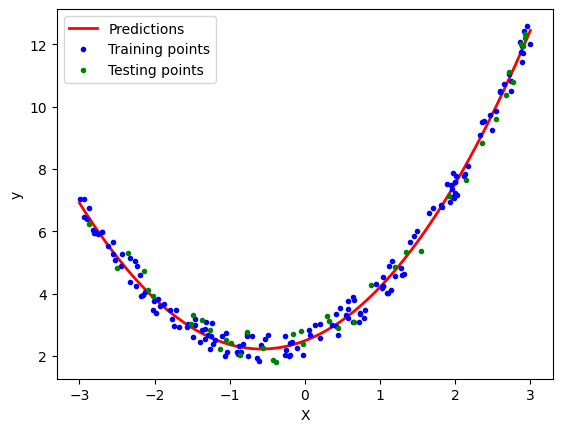

In [ ]:
plt.plot(X_new, y_new, "r-", linewidth=2, label='Predictions')
plt.plot(X_train, y_train, "b.", label='Training points')
plt.plot(X_test, y_test, "g.",label="Testing points")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [ ]:
#There are certain graphs through which we can find out the right degree to apply to avoid underfitting(occurs when degree is set to very low), overfitting(occurs when degree is set to very high).


#3D Polynomial Regression

In [ ]:
#using 2 input col and 1 output col

x = 7 * np.random.rand(100,1) - 2.8    #x1(1st input col)
y = 7 * np.random.rand(100,1) - 2.8    #x2(2nd input col)

z = x**2 + y**2 +0.2*x +0.2*y + 0.1*x*y + 2 + np.random.randn(100,1)    #y(output)

#z = x^2 + y^2 + 0.2x + 0.2y + 0.1xy + 2

In [ ]:
import plotly.express as px
df = px.data.iris()   #taken iris dataset through plotly
fig = px.scatter_3d(df, x=x.ravel(), y = y.ravel(), z=z.ravel())
fig.show()

In [ ]:
X_multi = np.array([x,y]).reshape(100,2)
X_multi.shape

(100, 2)

In [ ]:
poly1 = PolynomialFeatures(degree=2)
X_multi_trans = poly1.fit_transform(X_multi)

#transforming the X which contains the 2 input cols(x and y)

In [ ]:
print(X_multi[0])
print(X_multi_trans[0])

#After transforming we getting 6 cols from 2 cols i.e after setting degree as 2.

[0.55200444 3.10801179]
[1.         0.55200444 3.10801179 0.3047089  1.7156363  9.6597373 ]


In [ ]:
X_multi_trans.shape


(100, 6)

In [ ]:
lr = LinearRegression()
lr.fit(X_multi_trans, z)

LinearRegression()

In [ ]:
print(lr.coef_)
print(lr.intercept_)

[[ 0.         -0.52398193  0.5518416   0.17059678 -0.03177557 -0.11135097]]
[11.52710441]


In [ ]:
# z_final = lr.predict(X_multi_trans).reshape(10,10)
# z_final

array([[11.87484015, 14.07219751, 10.13414834, 10.91308365, 11.88496813,
        11.7898512 , 13.04304014, 11.59901587, 13.27065216, 12.21570156],
       [ 9.44630745,  9.7757309 , 11.20478639,  9.18269979, 11.5000142 ,
        11.77784807, 12.5631934 , 12.1019721 , 11.0409174 , 10.53855511],
       [11.3727971 , 11.54134886, 11.93323052, 11.78968851, 12.11027196,
        15.02531071,  9.84859117, 11.95692559, 11.65266193,  9.30676096],
       [11.74549816, 11.78597708, 11.24131754, 11.70315419,  9.73370324,
        11.7288583 , 13.27337994, 10.90094042, 14.60207024, 12.42549047],
       [11.97248075,  9.80624239, 11.87953745, 10.52775963, 13.09618778,
        11.64702872, 11.67942501, 11.1596528 , 11.68529626, 11.97971092],
       [13.08534623, 12.00082357, 11.87738696, 13.2703836 , 11.20126781,
        12.40474559, 10.3201305 , 12.10217203, 12.69359653, 13.12957656],
       [11.60357147, 14.36205587, 12.4019741 , 12.41329274, 10.701062  ,
        12.49114347, 12.65127662, 14.12150925